In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('features.tsv', sep = '\t')
df_labels = pd.read_csv('labels.tsv', usecols = [1], sep = '\t', header = None)

In [7]:
df_labels

,1
0,Draw
1,Draw
2,Defeat
3,Win
4,Draw
5,Win
6,Defeat
7,Defeat
8,Win
9,Win


In [4]:
df

,Unnamed: 0,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_21518.0,League_24558.0,home_player_1_overall_rating,...,away_player_8_overall_rating,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,B365_Win,B365_Draw,B365_Defeat,BW_Win,BW_Draw,BW_Defeat
0,0,-5.0,-8.0,2.0,1.0,0.0,0.0,1,0,77.0,...,72.0,71.0,73.0,73.0,0.395683,0.287770,0.316547,0.389704,0.287782,0.322514
1,1,4.0,-2.0,4.0,1.0,0.0,0.0,1,0,76.0,...,74.0,76.0,71.0,72.0,0.624582,0.238903,0.136516,0.612713,0.253365,0.133922
2,2,18.0,7.0,6.0,6.0,0.0,0.0,1,0,81.0,...,88.0,78.0,90.0,88.0,0.390698,0.260465,0.348837,0.380496,0.279776,0.339728
3,3,1.0,1.0,2.0,3.0,0.0,0.0,1,0,79.0,...,79.0,81.0,81.0,79.0,0.360875,0.287606,0.351519,0.354839,0.290323,0.354839
4,4,1.0,1.0,3.0,1.0,0.0,0.0,1,0,74.0,...,69.0,67.0,76.0,76.0,0.651526,0.223380,0.125093,0.634855,0.224066,0.141079
5,5,3.0,6.0,3.0,4.0,0.0,0.0,1,0,76.0,...,77.0,80.0,78.0,82.0,0.288136,0.279661,0.432203,0.301462,0.283191,0.415347
6,6,-3.0,-12.0,2.0,1.0,0.0,0.0,1,0,76.0,...,75.0,77.0,76.0,73.0,0.431766,0.296839,0.271396,0.424779,0.292035,0.283186
7,7,-4.0,8.0,3.0,5.0,0.0,0.0,1,0,77.0,...,81.0,78.0,79.0,83.0,0.174192,0.252120,0.573687,0.180986,0.250046,0.568968
8,8,-9.0,-2.0,3.0,2.0,0.0,0.0,1,0,70.0,...,73.0,78.0,72.0,75.0,0.396166,0.297125,0.306709,0.388471,0.300752,0.310777
9,9,-7.0,2.0,0.0,3.0,0.0,0.0,1,0,77.0,...,75.0,81.0,78.0,82.0,0.254967,0.289735,0.455298,0.267123,0.287671,0.445205


In [21]:
X = df.drop('Unnamed: 0', axis=1)

In [22]:
X

,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_21518.0,League_24558.0,home_player_1_overall_rating,home_player_2_overall_rating,...,away_player_8_overall_rating,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,B365_Win,B365_Draw,B365_Defeat,BW_Win,BW_Draw,BW_Defeat
0,-5.0,-8.0,2.0,1.0,0.0,0.0,1,0,77.0,69.0,...,72.0,71.0,73.0,73.0,0.395683,0.287770,0.316547,0.389704,0.287782,0.322514
1,4.0,-2.0,4.0,1.0,0.0,0.0,1,0,76.0,79.0,...,74.0,76.0,71.0,72.0,0.624582,0.238903,0.136516,0.612713,0.253365,0.133922
2,18.0,7.0,6.0,6.0,0.0,0.0,1,0,81.0,81.0,...,88.0,78.0,90.0,88.0,0.390698,0.260465,0.348837,0.380496,0.279776,0.339728
3,1.0,1.0,2.0,3.0,0.0,0.0,1,0,79.0,65.0,...,79.0,81.0,81.0,79.0,0.360875,0.287606,0.351519,0.354839,0.290323,0.354839
4,1.0,1.0,3.0,1.0,0.0,0.0,1,0,74.0,73.0,...,69.0,67.0,76.0,76.0,0.651526,0.223380,0.125093,0.634855,0.224066,0.141079
5,3.0,6.0,3.0,4.0,0.0,0.0,1,0,76.0,74.0,...,77.0,80.0,78.0,82.0,0.288136,0.279661,0.432203,0.301462,0.283191,0.415347
6,-3.0,-12.0,2.0,1.0,0.0,0.0,1,0,76.0,76.0,...,75.0,77.0,76.0,73.0,0.431766,0.296839,0.271396,0.424779,0.292035,0.283186
7,-4.0,8.0,3.0,5.0,0.0,0.0,1,0,77.0,73.0,...,81.0,78.0,79.0,83.0,0.174192,0.252120,0.573687,0.180986,0.250046,0.568968
8,-9.0,-2.0,3.0,2.0,0.0,0.0,1,0,70.0,76.0,...,73.0,78.0,72.0,75.0,0.396166,0.297125,0.306709,0.388471,0.300752,0.310777
9,-7.0,2.0,0.0,3.0,0.0,0.0,1,0,77.0,76.0,...,75.0,81.0,78.0,82.0,0.254967,0.289735,0.455298,0.267123,0.287671,0.445205


In [37]:
scaler = StandardScaler()
scaler.fit(X)
df_scaled = scaler.transform(X)

In [38]:
pca = PCA(0.90)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

In [39]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_scaled, df_labels,test_size=0.33, random_state=42)

In [40]:
RF_clf = RandomForestClassifier(n_estimators = 200, random_state = 1, class_weight = 'balanced')

In [41]:
RF_clf.fit(X_train_pca, y_train_pca)

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [42]:
RF_clf.score(X_test_pca, y_test_pca)

0.5233644859813084

In [43]:
df_pred = RF_clf.predict(X_test_pca)
labels = ["Win", "Draw", "Defeat"]
cm = confusion_matrix(y_test_pca, df_pred, labels)

In [44]:
cm = cm.astype('float') / cm.sum()

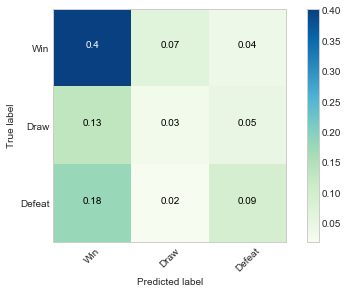

In [45]:
sns.set_style("whitegrid", {"axes.grid" : False})
fig = plt.figure(1)    
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.GnBu)
#title= "Confusion matrix of a {} with {}".format(best_clf.base_estimator.__class__.__name__, best_dm_reduce.__class__.__name__)   
#plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, round(cm[i, j], 2),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
    
plt.show()